<h1><center>Deep Learning</center></h1>
<h2><center>Assignment # 1</center></h2>
#### Brief
• Due date: 21 Feb, 2018 Thursday 11:59 PM<br>
• **First part:** Data visualization and pre-processing<br> 
• **Second Part:** Implement linear regression<br>
• **Third Part:** Read Paper and write summary<br> 
• **Required ﬁles:** Submit your ipython notebook (this file under the name of **RollNumber_A01.ipynb**) along with a **RollNumber_ReportA01.pdf (no docs or text file)** (strictly follow this notation).<br>
• Submission: Google Classroom<br>

#### Marks Distribution
Part 1: 10 Marks <br>
Part 2: 25 Marks <br>
Part 3: 15 Marks <br>

#### Overview
In the first part of this assignment, you have to pre-process the given data. In the second part implement the Linear Regression discussed in the class.<br>
For the first part of the assignment, we will use 'googleplaystore.csv' dataset which contain information of application on the google play store. For the second part we will use scaled down version of boston house price dataset.
All datasets have been provided along with this ipynb file on the classrom.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re
%matplotlib inline


## Part 1
### Data Pre-Processing and visualization

In [13]:
# There is a series of tutorials on pandas library https://www.tutorialspoint.com/python_pandas/python_pandas_introduction.htm

# Load Dataset
data = pd.read_csv('googleplaystore.csv')


In [14]:
# Print the column names of the data variable
######################################################

#data.head()
#print(data.columns)
print(data.columns.values)
#print(list(data.columns.values))
#print(list(data.dtypes))

['App' 'Category' 'Rating' 'Reviews' 'Size' 'Installs' 'Type' 'Price'
 'Content Rating' 'Genres' 'Last Updated' 'Current Ver' 'Android Ver']


In [15]:
# Write a method to calculate the total profit (i.e. No. of installations x price) of all apps which are 4.3 or below
##########################################################################################################################

data.insert(loc = len(data.columns),column='Profit_for4.3nBelow', value = float)

#print(len(data['Android Ver']))
#print((data['Android Ver'][1]))
#k = (data['Android Ver'][1])
#print(re.findall(r"[-+]?\d*\.\d+|\d+", k))    
#i = float(re.findall(r"[-+]?\d*\.\d+|\d+",  k)[0])
#print (i)

indices =[]
Is_NaN = data['Android Ver'].isna()

for i in range(len(Is_NaN)):
    if Is_NaN[i] == True:
        indices.append(i)

#print(indices)
for i in indices:
    data['Android Ver'][i] = '4.0.0'

for i in range(len(data['Android Ver'])):
    and_ver = data['Android Ver'][i]
    #print(and_ver)
    if (and_ver == 'Varies with device'):
        and_ver = '4.0.0'
    version = float(re.findall(r"[-+]?\d*\.\d+|\d+",  and_ver)[0])
    if (version <= 4.3):
        data['Profit_for4.3nBelow'][i] = float(data['Installs'][i].replace(',','').strip('+')) *  float(data['Price'][i].strip('$'))
    else:
        data['Profit_for4.3nBelow'][i] = 'NaN'

        

c:\python36\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python36\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python36\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
# Some rating values are missing, fill those values by taking average of above and below app rating of that app. 
###################################################################################################################

#data = pd.read_csv('googleplaystore.csv')

indices =[]
Is_NaN = data.Rating.isna()

for i in range(len(Is_NaN)):
    if Is_NaN[i] == True:
        indices.append(i)
        
print(len(indices))

for index in indices:
    if (index - 1) > -1 and (index + 1) <= data.shape[0]:
        if (np.isnan(data.Rating.get_value(index-1)) ==  True):
            data['Rating'][index - 1] = data['Rating'][index - 2]
        if (np.isnan(data.Rating.get_value(index+1)) ==  True):
            data['Rating'][index + 1] = data['Rating'][index - 1]
        average = (data.Rating.get_value(index-1) + data.Rating.get_value(index+1))/2.0
        
            
    data['Rating'][index] = average
    

1474


c:\python36\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
c:\python36\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
c:\python36\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
c:\python36\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python36\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: h

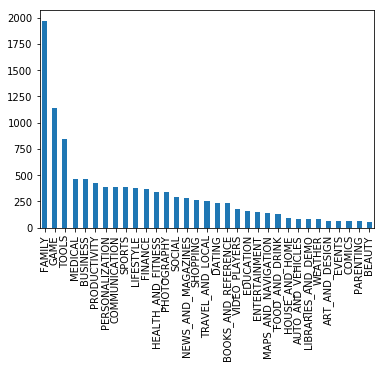

In [36]:
# Create a histogram graph of total count of each category in the dataset.
############################################################################

data.Category.value_counts()
data.Category.value_counts().plot(kind = 'bar')

Android Ver
1.0 and up            0.000000e+00
1.5 and up            6.182350e+04
1.6 and up            3.768736e+06
2.0 and up            1.109009e+06
2.0.1 and up          1.894244e+05
2.1 and up            8.324022e+05
2.2 - 7.1.1           0.000000e+00
2.2 and up            1.398355e+06
2.3 and up            2.488614e+07
2.3.3 and up          9.442051e+06
3.0 and up            1.070706e+07
3.1 and up            4.950000e+00
3.2 and up            6.139385e+04
4.0 and up            4.028438e+07
4.0.0                 1.490000e+03
4.0.3 - 7.1.1         0.000000e+00
4.0.3 and up          4.959422e+07
4.1 - 7.1.1           0.000000e+00
4.1 and up            4.513077e+07
4.2 and up            9.224184e+06
4.3 and up            3.492658e+06
4.4 and up            2.024084e+07
4.4W and up           2.497900e+05
5.0 - 6.0             0.000000e+00
5.0 - 7.1.1           0.000000e+00
5.0 - 8.0             0.000000e+00
5.0 and up            9.015109e+06
5.1 and up            7.494900e+04
6.0 and 

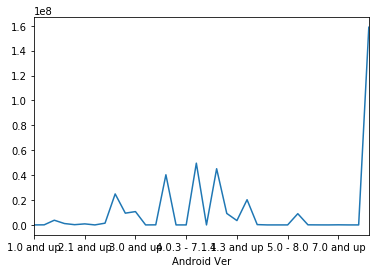

In [40]:
# Draw a graph of profit generated by each android version.
###########################################################

#data.insert(loc = len(data.columns),column='Profit_byAndroidVersion', value = float)
#data['Profit_byAndroidVersion'] = data['Installs'].str.replace(',','').str.strip('+').astype(float) *  data['Price'].str.strip('$').astype(float)
                                             
android_versions = data.groupby('Android Ver')
profits = android_versions['Profit_byAndroidVersion'].sum()
profits.plot()
profits

Content Rating
Everyone        1529
Teen             261
Everyone 10+     131
Mature 17+        50
Unrated            1
Name: Content Rating, dtype: int64


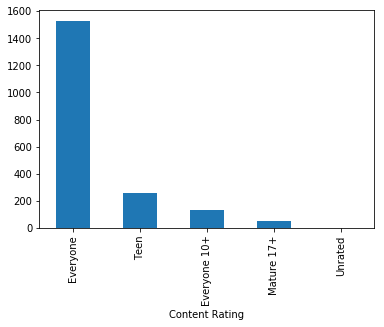

In [41]:
# Plot Number of installation which belongs to family category based on content rating.
############################################################################################

categories = data.groupby('Category')
x = categories['Content Rating'].value_counts()
x['FAMILY'].plot(kind='bar')
print(x['FAMILY'])

# Part 2
### Linear Regression

The goal of this assignment is to develop your understanding of a basic Machine Learning model and learn some basic concepts such as how datasets are visualised and misc. We think that it is necessary to not only understand the mathematics behind the models but also to know how to convert that knowledge into code that can work.



Implementation detail of each step is given below.

# DATASET 1

In [42]:
# Load Dataset
######## DATASET 1############

#(x_train, y_train), (x_test, y_test)= pickle.load( open( "dataset2.pkl", "rb" ) )

#You can load the second dataset in similar fashion
(x_train, y_train), (x_test, y_test)= pickle.load( open( "dataset.pkl", "rb" ) )

# to convert data from 2D i.e. N rows with 1 column to simple 1D N rows.
x_train.resize(len(x_train))
x_test.resize(len(x_test))


#### Part 2.a Linear Regression(without gradient descent) 

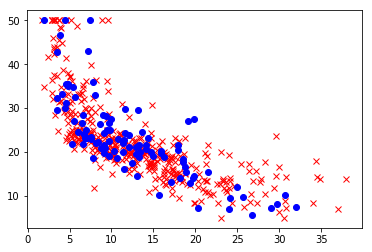

In [43]:
# Display training and testing dataset with different colors using matplotlib library.
#print(len(x_train))
#print(len(x_test))
#print(x_train)
#print(y_train)
#print(x_test)
#print(y_test)

plt.plot(x_train, y_train, 'rx')
plt.plot(x_test, y_test, 'bo')

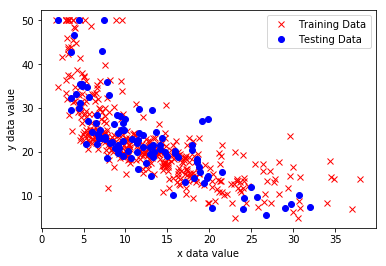

In [44]:
plt.plot( x_train, y_train,  'rx', label = 'Training Data')
plt.plot( x_test,  y_test, 'bo', label = 'Testing Data')
plt.xlabel('x data value')
plt.ylabel('y data value')
plt.legend()

In [45]:
# Compute line parameters from training data. 
# Compute 'm' and 'c' of line by formula given in: https://wikimedia.org/api/rest_v1/media/math/render/svg/8d2945202d09869511723ad4b0dfe5926cc3d2a0
# a-hat is c and b-hat is m in equation y = mx + c
#################################################################################################################################

x_bar = np.mean(x_train)
y_bar = np.mean(y_train)

##### METHOD 1 ############
cov = 0
var = 0
print(len(x_train))
for i in range(len(x_train)): 
    cov += (x_train[i] - x_bar) * (y_train[i] - y_bar)
    var += (x_train[i] - x_bar)**2


#b-hat
m = cov/var
#a-hat
c = y_bar - m*x_bar
print(m,c)

##### METHOD 2 ############
cov = np.cov(x_train,y_train, ddof=0)[0,1]
var = np.var(x_train, ddof =0)
m=cov/var
c = y_bar - m*x_bar
print(m,c)

404
-0.9278216902292562 34.216255712624125
-0.9278216902292563 34.216255712624125


In [46]:
# Implement mean square error function. i.e err = mean_square_error(Y_actual, Y_predicted)
# where err is the mean square error of actual label (i.e. Y_actual) and predicted lable ( i.e. Y_predicted)
##################################################################################################################

def MSE(Y_actual, Y_predicted):
    mse=0
    size = Y_actual.size
    
    if (size == 1):
        mse = (Y_predicted - Y_actual)**2
        #print("MSE OF SAMPLE")
        #print(mse)
        return mse
    
    for i in range(size):
            mse += (Y_predicted[i] - Y_actual[i])**2
    return (mse/size)


In [47]:
# Compute mean square error from line using training data i.e. training error.
#######################################################################################

#finding Y_predicted
y_train_predicted =[]
train_error = 0.0

for i in range(len(x_train)):
    y_train_predicted.append(c + m*x_train[i])
    
train_error = MSE (y_train, y_train_predicted)
print(train_error)

39.429056363858884


In [48]:
# Compute mean square error from line using test data i.e. test error.
#######################################################################################

#finding Y_predicted
y_test_predicted =[]
test_error = 0.0

for i in range(len(x_test)):
    y_test_predicted.append(c + m*x_test[i])
    
test_error = MSE (y_test, y_test_predicted)
print(test_error)

34.87619673683118


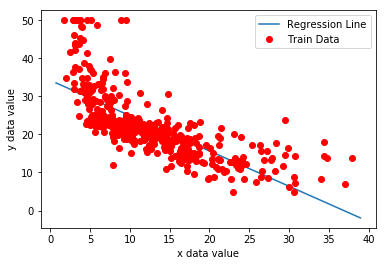

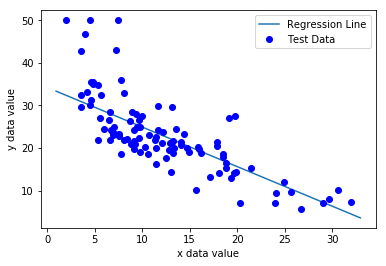

In [49]:
# Plot regression line on training and testing data separately.
##############################################################################################

### Training Data ###
maximum_x = np.max(x_train) + 1
minimum_x = np.min(x_train) - 1
x = np.linspace(minimum_x, maximum_x)
y = m*x + c
plt.plot(x, y, label='Regression Line')
plt.plot(x_train, y_train, 'ro', label='Train Data')
plt.xlabel('x data value')
plt.ylabel('y data value')
plt.legend()
plt.show()

### Testing Data ###
maximum_x = np.max(x_test) + 1
minimum_x = np.min(x_test) - 1
x = np.linspace(minimum_x, maximum_x)
y = m*x + c
plt.plot(x, y, label='Regression Line')
plt.plot(x_test, y_test, 'bo', label='Test Data')
plt.xlabel('x data value')
plt.ylabel('y data value')
plt.legend()
plt.show()

#### Part 2.b Linear Regression (with gradient descent)

In [50]:
# Initialize parameters i.e. learning rates, initial values of line parameters and number of epochs.
#######################################################################################################
alpha = 0.001
m_sgd = 0
c_sgd = 0
epochs = 8


0


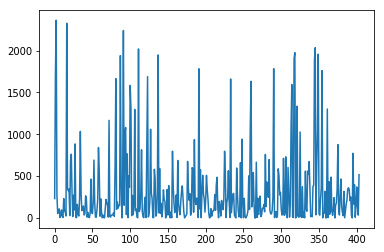

1


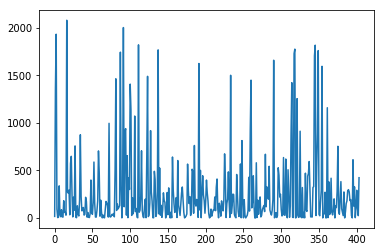

2


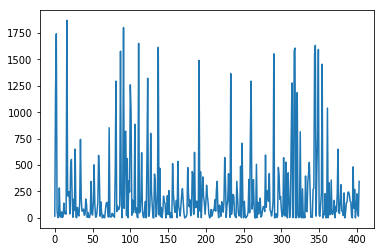

3


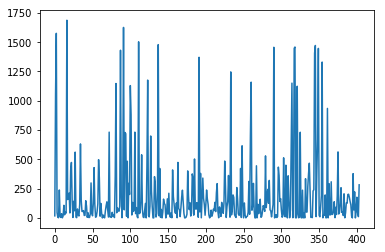

4


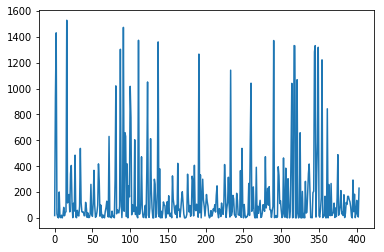

5


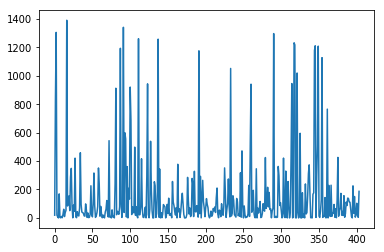

6


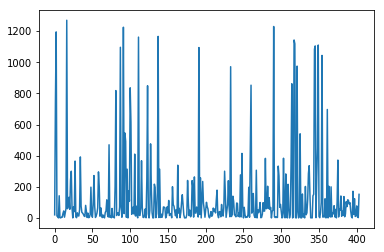

7


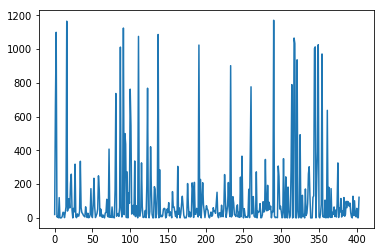

8


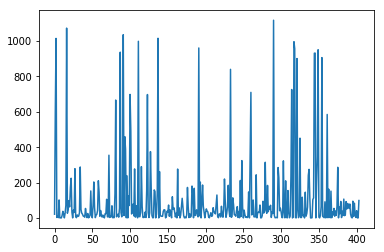

9


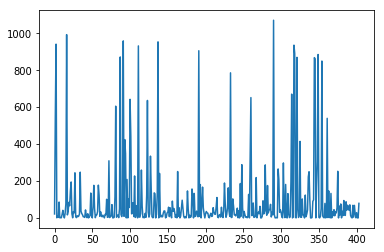

10


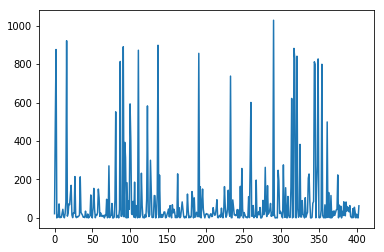

11


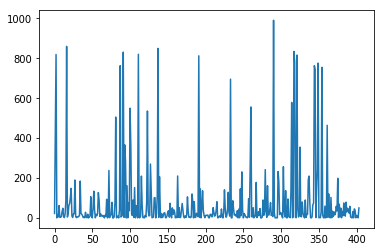

12


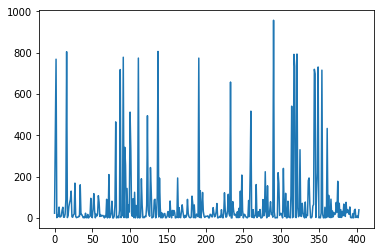

13


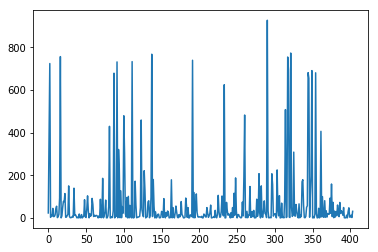

14


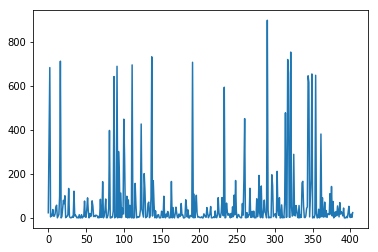

15


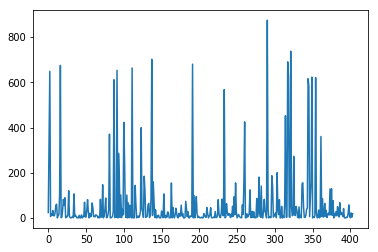

16


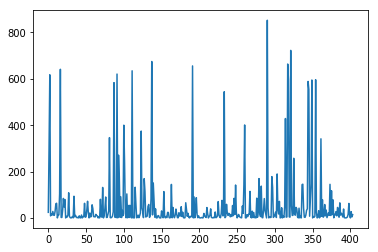

17


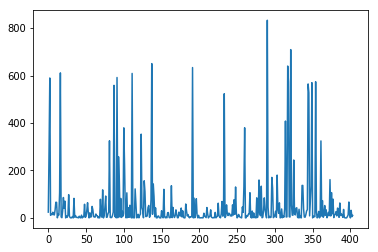

18


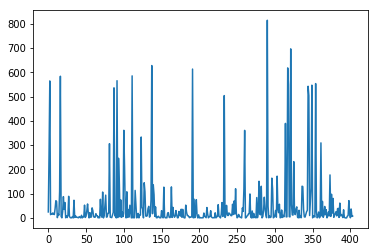

19


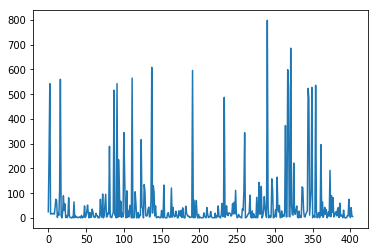

20


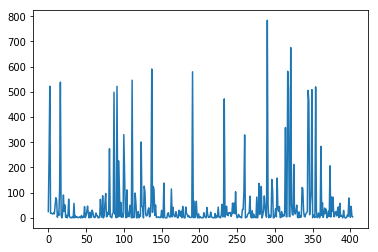

21


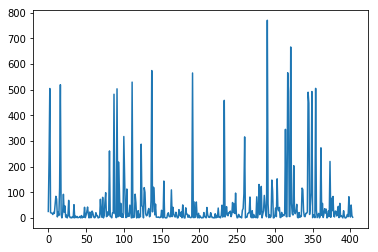

22


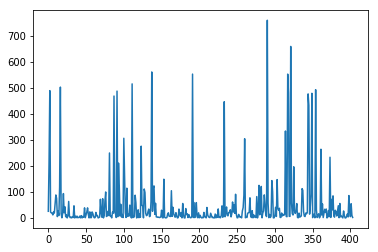

23


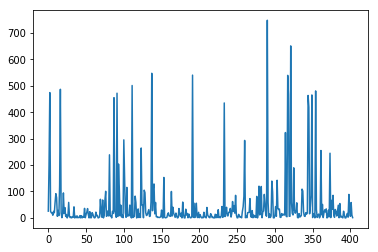

24


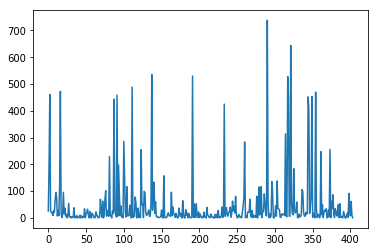

25


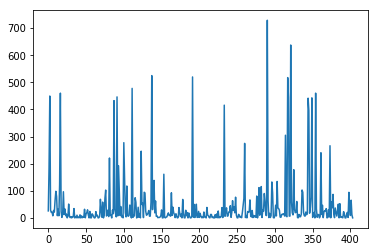

26


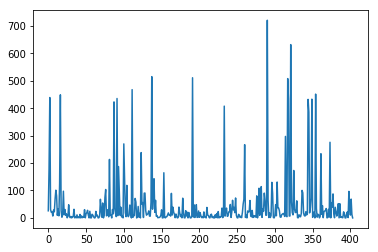

27


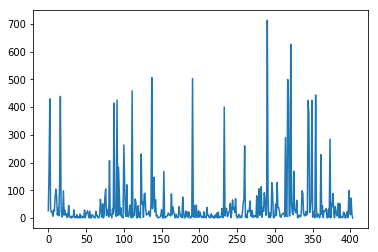

28


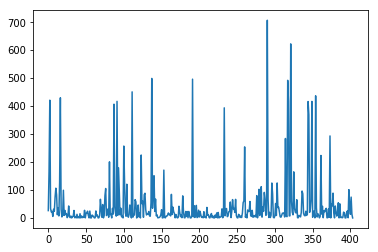

29


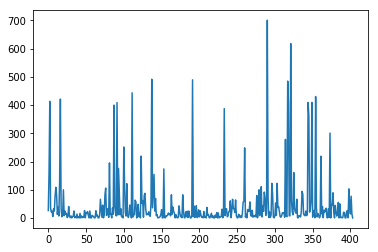

30


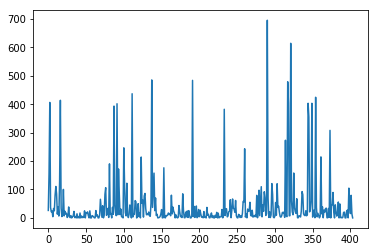

31


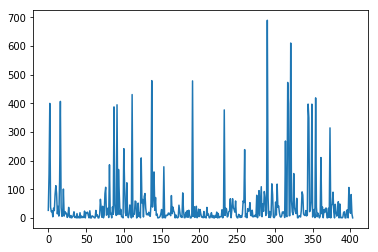

32


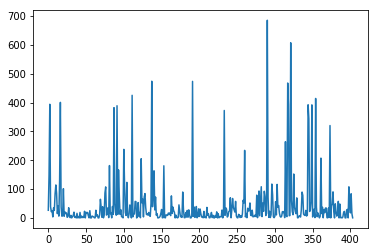

33


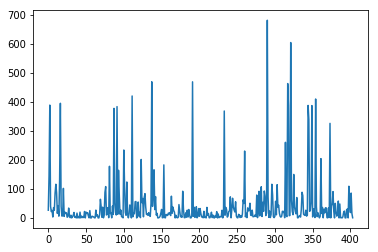

34


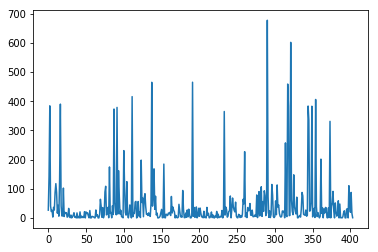

35


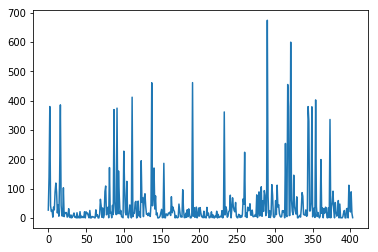

36


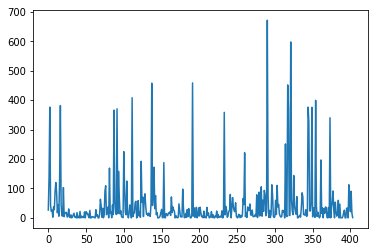

37


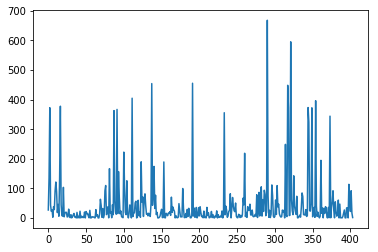

38


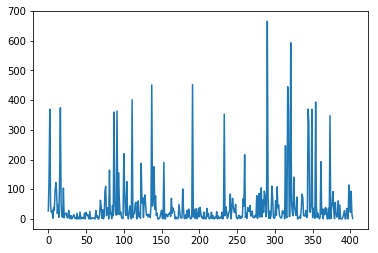

39


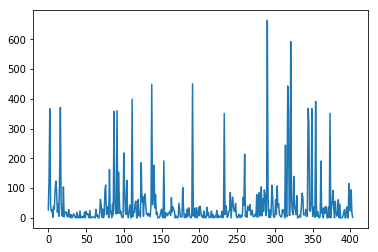

40


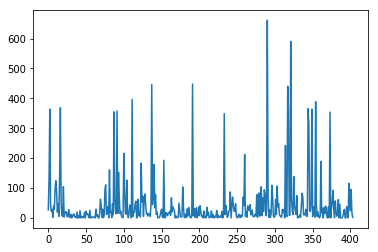

41


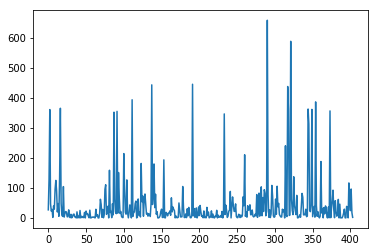

42


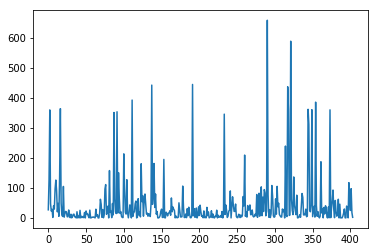

43


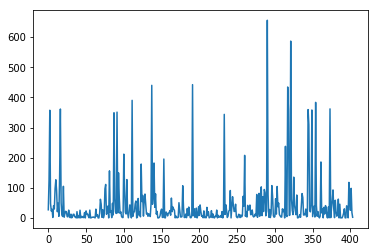

44


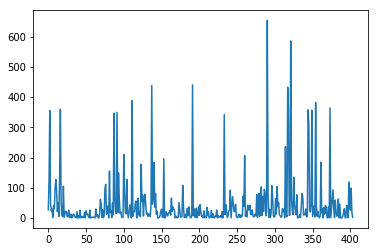

45


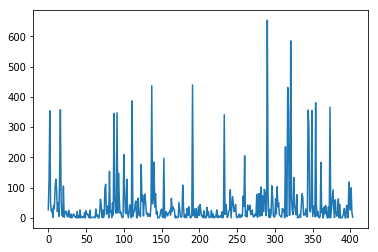

46


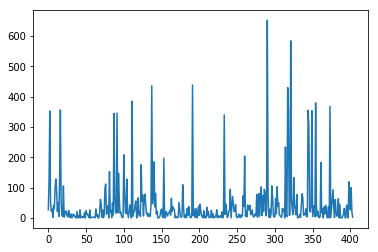

47


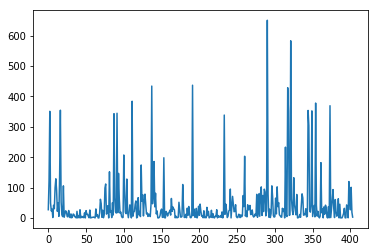

48


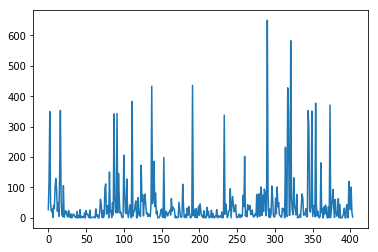

49


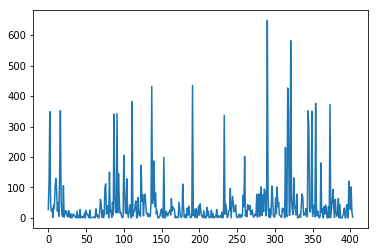

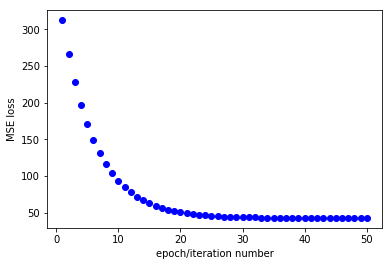

In [51]:
# Predict output and update parameters using stochastic gradient descent.
# Compute mean square error in each iteration using mean_square_error function and plot on the graph using matplotlib library
##############################################################################################################################

mse_in_epochs = []
epoch_list =[]
previous_cost = 0.0
current_cost = 0.0

for epoch in range(50):
    loss_per_sample = []
    sample_list = []
    print(epoch)
    epoch_list.append(epoch+1)
    mse_in_one_epoch = 0.0
    for i in range(len(x_train)):
        sample_list.append(i)
        y_pred = c_sgd + m_sgd * x_train[i]
        ########## CHECK ###########
        #mse = (y_train[i]-y_pred)**2
        #total_mse += mse
        #print(total_mse)
        ############################
        mse_of_sample = MSE(y_train[i], y_pred) #loss for predicting one sample---not divided by total number of samples
        loss_per_sample.append(mse_of_sample) #list of loss for each sample (in one epoch) to plot graph for loss per iteration
        #plt.plot(sample_list, mse_of_sample)
        mse_in_one_epoch += mse_of_sample #compiling total MSE loss in one epoch, sum of loss for each sample
        # updating parameter in each iteration
        m_sgd = m_sgd - alpha*(y_pred - y_train[i])*x_train[i]
        c_sgd = c_sgd - alpha*(y_pred - y_train[i])
        
    mse_in_epochs.append(mse_in_one_epoch/len(x_train))
    plt.plot(sample_list, loss_per_sample)
    plt.show()
    current_cost = mse_in_epochs[epoch]
    diff = abs(current_cost - previous_cost)
    previous_cost = current_cost
    if (diff<0.001):
        print("converged")
        print("epoch number")
        print(epoch)
        print("current loss value")
        print(mse_in_epochs[epoch])
        #break
plt.plot( epoch_list,mse_in_epochs, 'bo')
plt.xlabel('epoch/iteration number')
plt.ylabel('MSE loss')
plt.show()


In [52]:
# Compute mean square error from line using training data i.e. training error.
#######################################################################################
print(m_sgd,c_sgd)
#finding Y_predicted
y_train_predicted =[]
train_error = 0.0

for i in range(len(x_train)):
    y_train_predicted.append(c_sgd + m_sgd*x_train[i])
    
train_error = MSE (y_train, y_train_predicted)
print(train_error)

-0.7214360638168078 33.911381327506305
47.069200592910576


In [53]:
# Compute mean square error of final trained parameters on testing data
#####################################################################################

#finding Y_predicted
y_test_predicted =[]
test_error = 0.0

for i in range(len(x_test)):
    y_test_predicted.append(c_sgd + m_sgd*x_test[i])
    
test_error = MSE (y_test, y_test_predicted)
print(test_error)

42.788472086549035


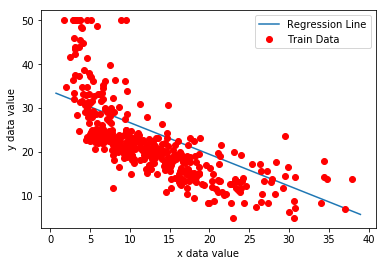

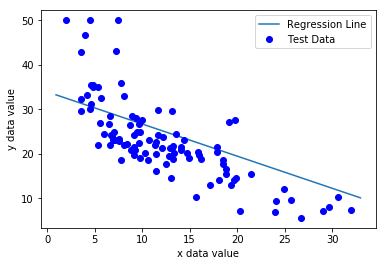

In [54]:
# Plot regression line on training and testing data separately.
##############################################################################################

### Training Data ###
maximum_x = np.max(x_train) + 1
minimum_x = np.min(x_train) - 1
x = np.linspace(minimum_x, maximum_x)
y = m_sgd*x + c_sgd
plt.plot(x, y, label='Regression Line')
plt.plot(x_train, y_train, 'ro', label='Train Data')
plt.xlabel('x data value')
plt.ylabel('y data value')
plt.legend()
plt.show()

### Testing Data ###
maximum_x = np.max(x_test) + 1
minimum_x = np.min(x_test) - 1
x = np.linspace(minimum_x, maximum_x)
y = m_sgd*x + c_sgd
plt.plot(x, y, label='Regression Line')
plt.plot(x_test, y_test, 'bo', label='Test Data')
plt.xlabel('x data value')
plt.ylabel('y data value')
plt.legend()
plt.show()

# DATASET 2

In [55]:
# Load Dataset
######## DATASET 1############

(x_train, y_train), (x_test, y_test)= pickle.load( open( "dataset2.pkl", "rb" ) )


# to convert data from 2D i.e. N rows with 1 column to simple 1D N rows.
x_train.resize(len(x_train))
x_test.resize(len(x_test))


#### Part 2.a Linear Regression(without gradient descent) 

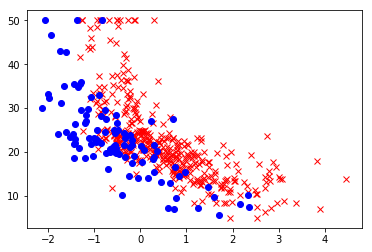

In [56]:
# Display training and testing dataset with different colors using matplotlib library.
#print(len(x_train))
#print(len(x_test))
#print(x_train)
#print(y_train)
#print(x_test)
#print(y_test)

plt.plot(x_train, y_train, 'rx')
plt.plot(x_test, y_test, 'bo')

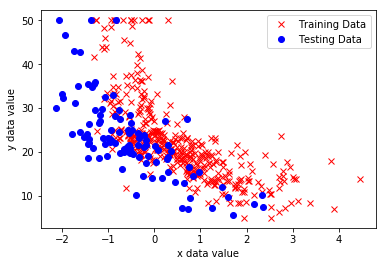

In [57]:
plt.plot( x_train, y_train,  'rx', label = 'Training Data')
plt.plot( x_test,  y_test, 'bo', label = 'Testing Data')
plt.xlabel('x data value')
plt.ylabel('y data value')
plt.legend()

In [58]:
# Compute line parameters from training data. 
# Compute 'm' and 'c' of line by formula given in: https://wikimedia.org/api/rest_v1/media/math/render/svg/8d2945202d09869511723ad4b0dfe5926cc3d2a0
# a-hat is c and b-hat is m in equation y = mx + c
#################################################################################################################################

x_bar = np.mean(x_train)
y_bar = np.mean(y_train)

##### METHOD 1 ############
cov = 0
var = 0
print(len(x_train))
for i in range(len(x_train)): 
    cov += (x_train[i] - x_bar) * (y_train[i] - y_bar)
    var += (x_train[i] - x_bar)**2


#b-hat
m = cov/var
#a-hat
c = y_bar - m*x_bar
print(m,c)

##### METHOD 2 ############
cov = np.cov(x_train,y_train, ddof=0)[0,1]
var = np.var(x_train, ddof =0)
m=cov/var
c = y_bar - m*x_bar
print(m,c)

404
-6.238131127132846 25.5263621729055
-6.2381311271328475 25.5263621729055


In [59]:
# Compute mean square error from line using training data i.e. training error.
#######################################################################################

#finding Y_predicted
y_train_predicted =[]
train_error = 0.0

for i in range(len(x_train)):
    y_train_predicted.append(c + m*x_train[i])
    
train_error = MSE (y_train, y_train_predicted)
print(train_error)

42.84019807969878


In [60]:
# Compute mean square error from line using test data i.e. test error.
#######################################################################################

#finding Y_predicted
y_test_predicted =[]
test_error = 0.0

for i in range(len(x_test)):
    y_test_predicted.append(c + m*x_test[i])
    
test_error = MSE (y_test, y_test_predicted)
print(test_error)

70.80834523792943


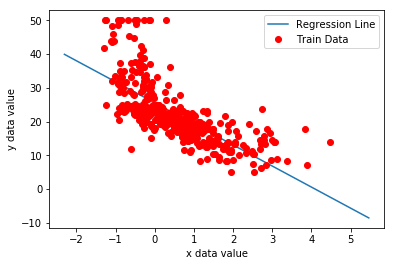

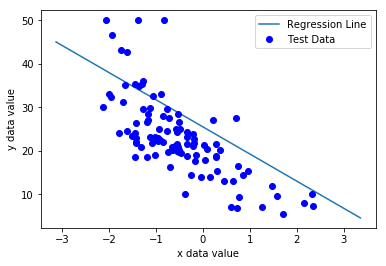

In [61]:
# Plot regression line on training and testing data separately.
##############################################################################################

### Training Data ###
maximum_x = np.max(x_train) + 1
minimum_x = np.min(x_train) - 1
x = np.linspace(minimum_x, maximum_x)
y = m*x + c
plt.plot(x, y, label='Regression Line')
plt.plot(x_train, y_train, 'ro', label='Train Data')
plt.xlabel('x data value')
plt.ylabel('y data value')
plt.legend()
plt.show()

### Testing Data ###
maximum_x = np.max(x_test) + 1
minimum_x = np.min(x_test) - 1
x = np.linspace(minimum_x, maximum_x)
y = m*x + c
plt.plot(x, y, label='Regression Line')
plt.plot(x_test, y_test, 'bo', label='Test Data')
plt.xlabel('x data value')
plt.ylabel('y data value')
plt.legend()
plt.show()

#### Part 2.b Linear Regression (with gradient descent)

In [65]:
# Initialize parameters i.e. learning rates, initial values of line parameters and number of epochs.
#######################################################################################################
alpha = 0.001
m_sgd = 0
c_sgd = 0
epochs = 8

0


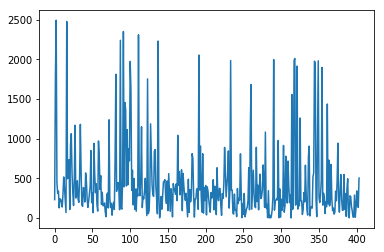

1


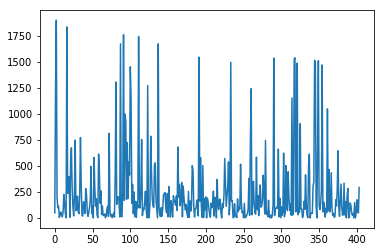

2


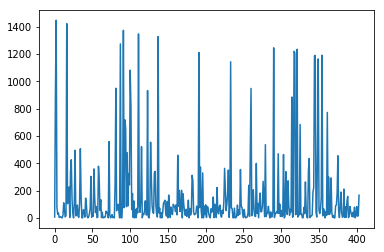

3


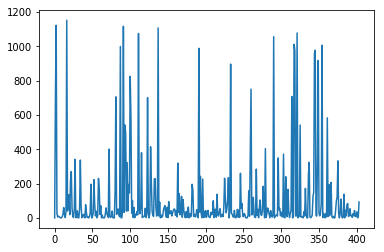

4


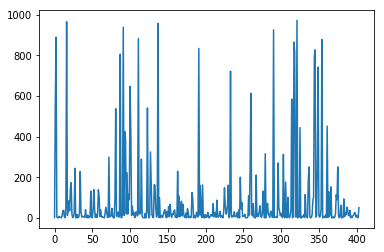

5


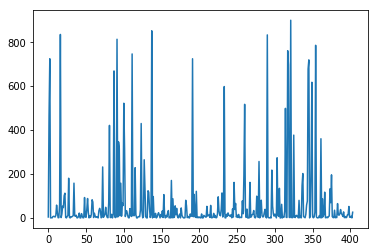

6


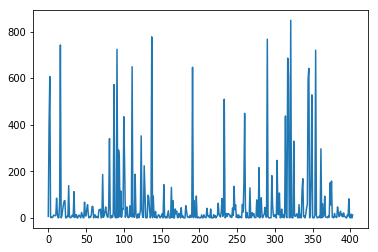

7


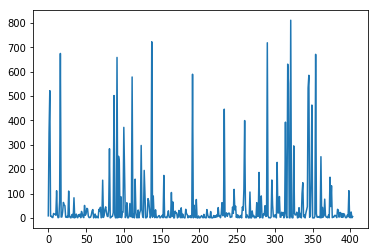

8


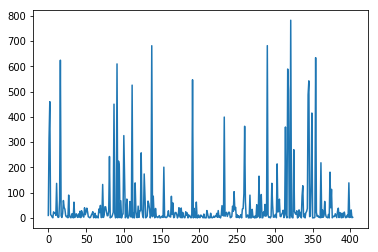

9


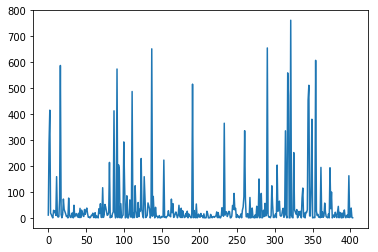

10


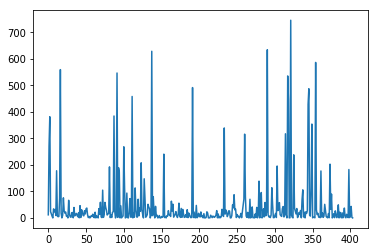

11


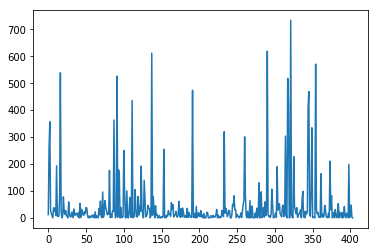

12


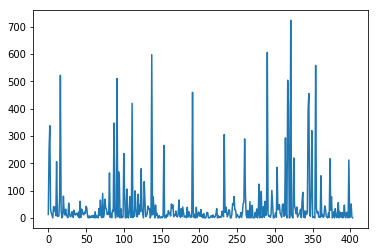

13


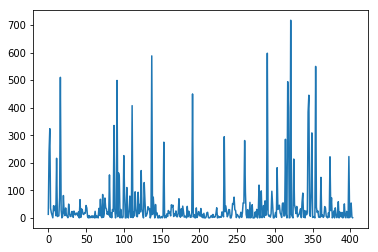

14


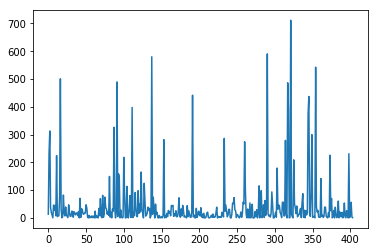

15


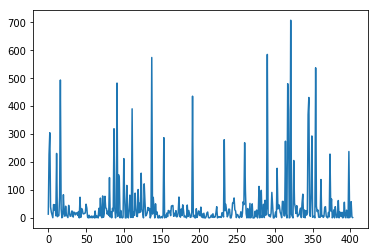

16


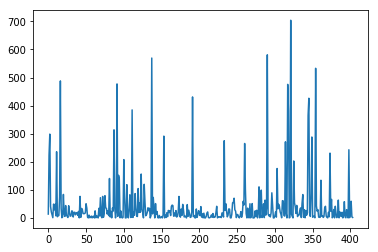

17


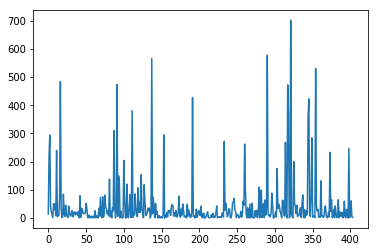

18


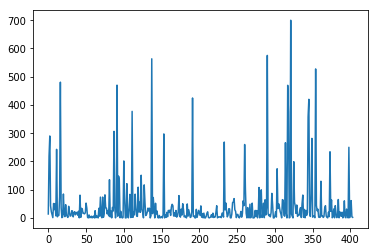

19


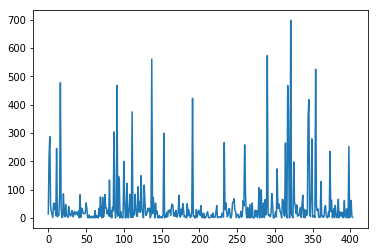

20


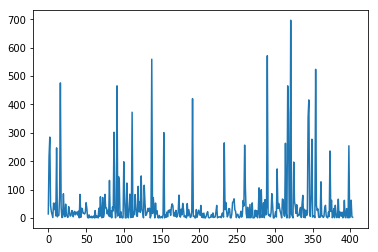

21


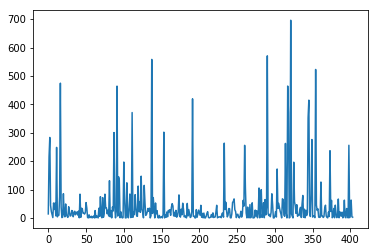

22


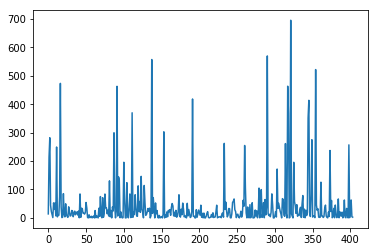

23


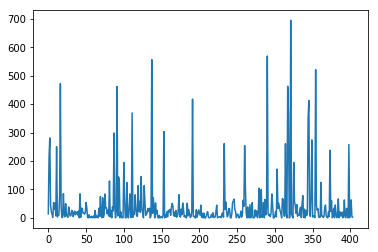

24


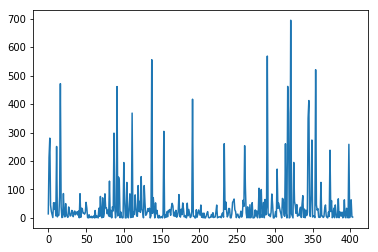

25


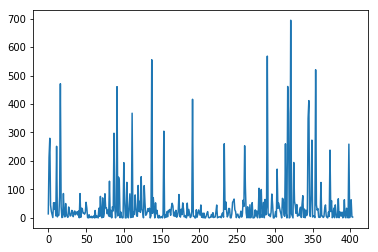

26


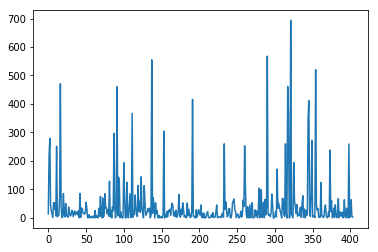

27


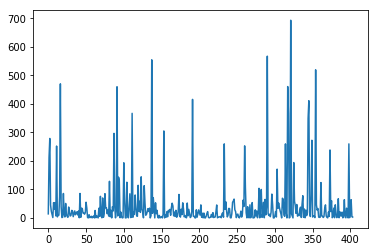

28


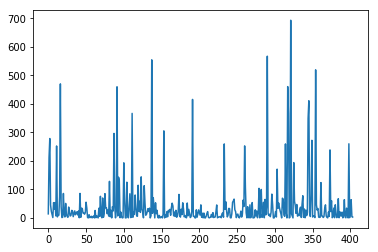

29


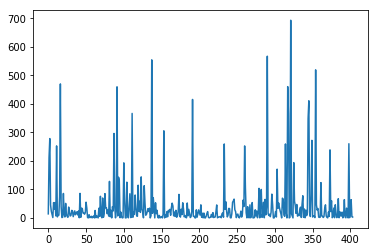

30


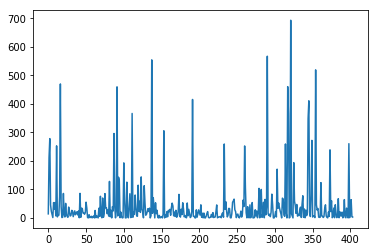

31


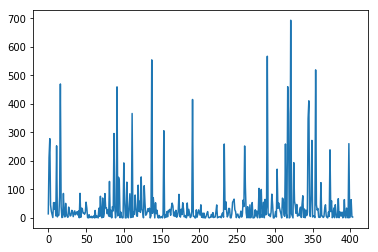

32


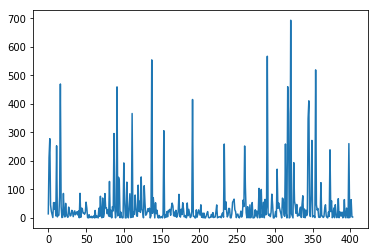

33


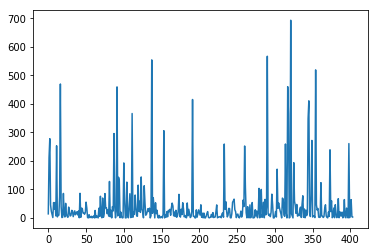

34


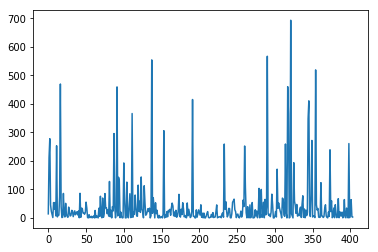

35


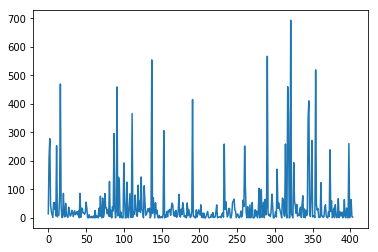

36


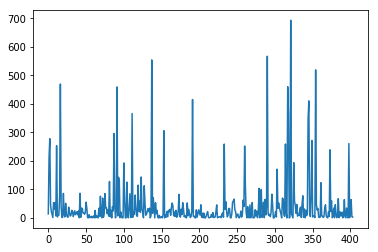

37


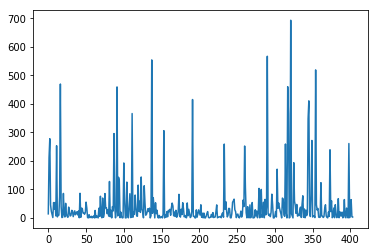

38


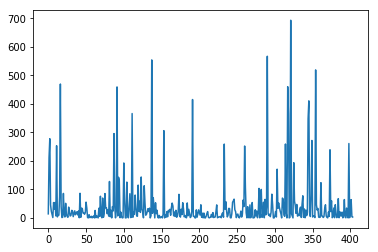

39


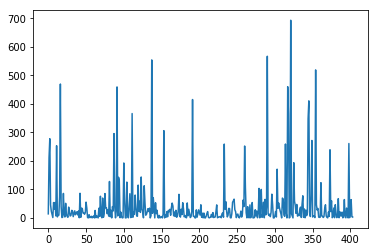

40


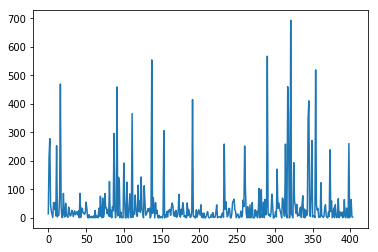

41


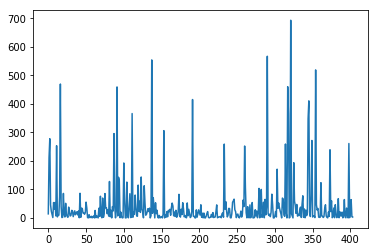

42


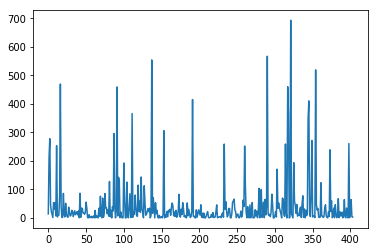

43


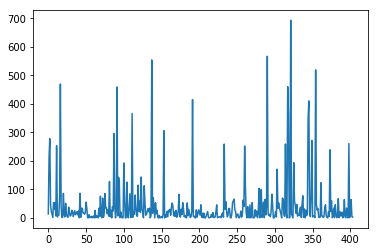

44


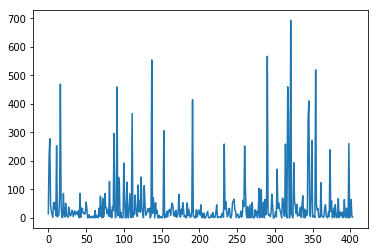

45


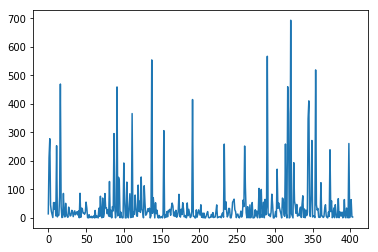

46


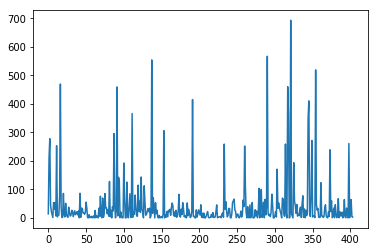

47


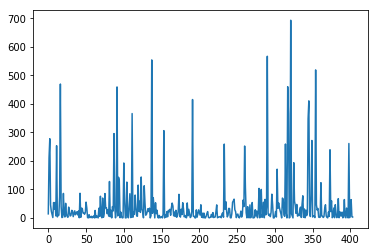

48


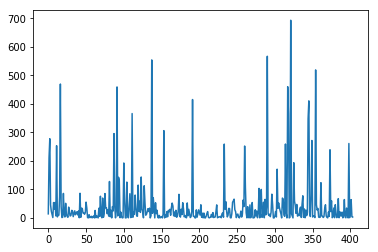

49


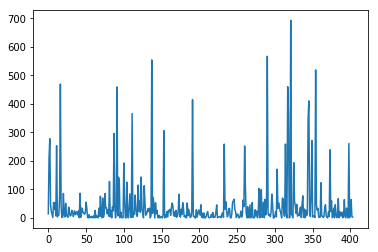

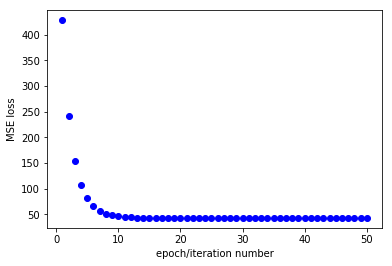

In [66]:
# Predict output and update parameters using stochastic gradient descent.
# Compute mean square error in each iteration using mean_square_error function and plot on the graph using matplotlib library
##############################################################################################################################

mse_in_epochs = []
epoch_list =[]

for epoch in range(50):
    loss_per_sample = []
    sample_list = []
    print(epoch)
    epoch_list.append(epoch+1)
    mse_in_one_epoch = 0.0
    for i in range(len(x_train)):
        sample_list.append(i)
        y_pred = c_sgd + m_sgd * x_train[i]
        
        ########## CHECK ###########
        #mse = (y_train[i]-y_pred)**2
        #total_mse += mse
        #print(total_mse)
        ############################
        
        mse_of_sample = MSE(y_train[i], y_pred) #loss for predicting one sample---not divided by total number of samples
        loss_per_sample.append(mse_of_sample) #list of loss for each sample (in one epoch) to plot graph for loss per iteration
        #plt.plot(sample_list, mse_of_sample)
        mse_in_one_epoch += mse_of_sample #compiling total MSE loss in one epoch, sum of loss for each sample
        
        # updating parameter in each iteration
        m_sgd = m_sgd - alpha*(y_pred - y_train[i])*x_train[i]
        c_sgd = c_sgd - alpha*(y_pred - y_train[i])
    mse_in_epochs.append(mse_in_one_epoch/len(x_train))
    plt.plot(sample_list, loss_per_sample)
    plt.show()
    if mse_in_epochs[epoch]<0.001:
        print("converged")
        print("epoch number")
        print(epoch)
        print("current loss value")
        print(mse_in_epochs[epoch])
        break
plt.plot( epoch_list,mse_in_epochs, 'bo')
plt.xlabel('epoch/iteration number')
plt.ylabel('MSE loss')
plt.show()


In [67]:
# Compute mean square error from line using training data i.e. training error.
#######################################################################################
print(m_sgd, c_sgd)

#finding Y_predicted
y_train_predicted =[]
train_error = 0.0

for i in range(len(x_train)):
    y_train_predicted.append(c_sgd + m_sgd*x_train[i])
    
train_error = MSE (y_train, y_train_predicted)
print(train_error)

-6.177611074129076 25.56815774050968
42.849339821845945


In [68]:
# Compute mean square error of final trained parameters on testing data
#####################################################################################

#finding Y_predicted
y_test_predicted =[]
test_error = 0.0

for i in range(len(x_test)):
    y_test_predicted.append(c_sgd + m_sgd*x_test[i])
    
test_error = MSE (y_test, y_test_predicted)
print(test_error)

71.0097975640113


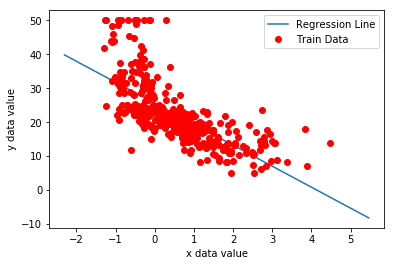

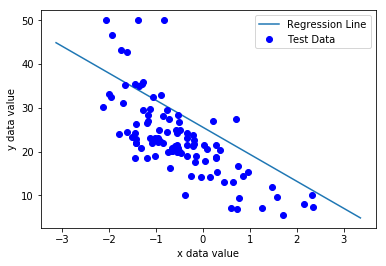

In [70]:
# Plot regression line on training and testing data separately.
##############################################################################################

### Training Data ###
maximum_x = np.max(x_train) + 1
minimum_x = np.min(x_train) - 1
x = np.linspace(minimum_x, maximum_x)
y = m_sgd*x + c_sgd
plt.plot(x, y, label='Regression Line')
plt.plot(x_train, y_train, 'ro', label='Train Data')
plt.xlabel('x data value')
plt.ylabel('y data value')
plt.legend()
plt.show()

### Testing Data ###
maximum_x = np.max(x_test) + 1
minimum_x = np.min(x_test) - 1
x = np.linspace(minimum_x, maximum_x)
y = m_sgd*x + c_sgd
plt.plot(x, y, label='Regression Line')
plt.plot(x_test, y_test, 'bo', label='Test Data')
plt.xlabel('x data value')
plt.ylabel('y data value')
plt.legend()
plt.show()

# Part 3

#### Details

• Theoratical:
<p style="text-indent: 1em;">• Answer the following question: For a 10 dimensional dataset, What is the minimum number of points that are required to fit a hyperplane? (3 Points)</p>
<p style="text-indent: 1em;">• Read the following paper "Deep Learning" (http://pages.cs.wisc.edu/~dyer/cs540/handouts/deeplearning-nature2015.pdf). It is an exciting paper published in Nature and written by three pioneers of the deep learning — Yann LeCun, Yoshua Bengio and Geoffrey Hinton. The tripod of deep learning if you will :). The objective of this reading is to get you guys excited about deep learning and what can be / has been achieved with it. Write a summary of this paper, and let us know what it is that you find most exciting about deep learning and why? Your summary should not exceed 200 words. </p>
<p style="text-indent: 1em;">• Question 1: Write a summary of the paper (7 Points) </p>
<p style="text-indent: 1em;">• Question 2: What is the difference between deep and shallow learning. Explain with concrete example(s) when shallow learning is suitable as compared to deep learning and vise versa. (5 Points)
</p><br>


#### Note (Again): Submit your ipython notebook (this file under the name of RollNumber_A01.ipynb) along with a RollNumber_ReportA01.pdf (no docs or text file) (strictly follow this notation).